### Chapter 1

데이터가 가지고 있는 패턴을 추출하는 것

데이터들의 특성을 보고 휴리스틱한 방법론이나 룰 기반 방식들을 생각할 수 있는데 예외 사항만 만들 뿐 결과는 좋지 않다.

ex) 자동차에서 ADAS 시스템은 수많은 조건문으로 구성되어 있음

-> 그래서 학습 데이터를 이용하여 어떤 모델을 선택하고 그 모델의 파라미터를 튜닝하는 기계학습 방식이 더 좋은 효과를 낸다.


#### Generalization Problem

하지만 일반화의 문제가 있는데 학습 데이터는 우리가 관찰한 출현 가능한 데이터 중 일부일 뿐이다. 그럼 목적은 출현하지 않은 데이터에 대해서도 학습된 모델로 데이터 패턴을 잘 추출해야 하는데 이 것이 일반화 문제이다.

Task 마다 이러한 일반화 문제는 모두 적용된다. 하지만 몇 Task 에서는(출현하지 않았지만 어느정도 출현이 예측되는 ?) 일반화의 문제를 다소 소극적 반영을 할 수도 있다.

#### Example

목표: 실수 범위의 입력변수 x를 관찰한 후 이 관찰 값을 바탕으로 실수 범위의 타겟 t의 값을 예측하고 싶다.

    타겟 (t) 가 함수 sin(2pi *x) 로부터 발현되는 실수 값이라고 가정
    이 때 발현된 값은 노이즈(noise)를 포함

1.1 Polynomial Curve fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

create_toy_data: toy 데이터 만드는 함수

    x: 0~1 사이를 sample size 만큼 나눈 데이터 ex) sample_size = 10 : x = [0, 0.111111, 0.22222, ...., 1]\
    y: sin(2pi*x) + noise

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t


def func(x):
    return np.sin(2 * np.pi * x)

x_train: 실수 범위의 x 데이터
y_train: x_train 의 sin(2pi * x) + noise

x_test: 실수 범위의 x 데이터
y_test: x_test 의 sin(2pi* x)


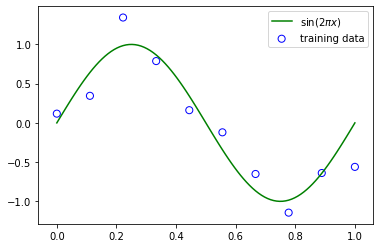

In [3]:
x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

노이즈를 포함한 관찰 데이터를 이용하여 최초 샘플 생성 함수인 $\sin(2\pi x)$ 를 정확히 얻어내기란 쉬운일이 아니다.

다음 2가지 이론을 이용해보자.

    Probability Theory: 불확실성을 정량화시켜 표현할 수 있는 수학적인 프레임워크 제공
    Decision Theory: 확률적 표현을 바탕으로 적절한 기준에 따라 최적의 예측을 수행할 수 있는 방법론 제공

다음과 같은 다항식 모델을 선택하도록 한다.
$$
y(x, W) = w_0 + w_1 x + w_2 x^2 + ... + w_M x^M = \sum_{j=0}^M w_j x^j
$$

갑자기 다항식 모델이 나타난 이유는?

    모델링을 해야 할 함수를 아직 알지 못하는 함수라고 가정하면 이를 근사할 수 있는 근사식이 필요
    일반적으로 테일러 급수나 퓨리에 변환 식 등으로 함수 근사를 많이 한다.
    여기서는 테일러 급수 형태의 근사식 추정을 수행하는 것이라 생각하면 된다.
    
    
일반적인 테일러 급수는 차수인 M 값을 늘릴수록 특정 위치(지점)에서 더 잘 맞는 근사식을 만들어 낼 수 있다.

하지만 우리는 최대한 모델을 일반화하여 Robust Model 을 만들어 내는 것이 목적!


이제 고정된 M 값 내에서 가장 적합한 w 를 구하는 문제로 전환된다.
식을 근사하기 위해 최적의 계수 w 를 구하는 방법을 알아본다.

이런 문제를 풀 때에는 **에러 함수(error function)** 를 도입하여 문제를 해결한다.

모델로부터 도출된 $y(x, W)$ 함수와 실제 타겟 값 t의 차이를 최소화 하는 방식을 통해 w 값을 결정할 수 잇다.

에러함수는 보통 제곱합(sum-of-wquares) 에러 함수를 사용한다.

    왜 이런 에러함수를 쓸까? y 함수가 convex 를 만족하는 경우 에러함수도 convex 를 만족하는 함수가 되고 미분 가능하게 된다.
    에러 함수를 w 에 대해 단순 미분하면 최소화 문제에서 유일한 해를 가지게 된다.

$$
E(w) = \frac{1}{2} \sum_{n=1}^N \{y(x_n, W) - t_n\}^2
$$

$E(w)$ 값을 최소로 만드는 $w$ 를 구하는 문제로 생각하면 된다.

정의된 에러 함수가 $w$ 에 대해 quadratic 의 함수 꼴이므로 이를 최소화 하는 값은 유일 해를 가지게 됨을 보장 받는다.

유일 해를 가질 때의 $w$ 값을 $w^*$ 라고 하자.

아래 두 클래스의 기능은 다음과 같다.

PolynomialFeature: M 차수를 가지는 다항식에 대한 관찰데이터 x에 대한 feature
LinearRegression: 
    

In [4]:
import itertools
import functools

class PolynomialFeature(object):
    """
    polynomial features
    
    transforms input array with polynomial features
    
    Example
    =======
    x = 
    [[a, b],
    [c, d]]
    
    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, b, a^2, a*b, b^2],
    [1, c, d, c^2, c*d, d^2]]
    """
    
    def __init__(self, degree=2):
        """
        construct polynomial features
        
        Parameters
        ----------
        degree : int
            degree of polynomial = M
        """
        assert isinstance(degree, int)
        self.degree = degree
        
    def transform(self, x):
        """
        transforms input array with polynomial features
        
        Parameters
        ----------
        x : (sample_size, n) ndarray
        
        Returns
        -------
        ouput : (sample_size, 1 + nC1 + ... + nCd) ndarray
        """
        
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()
    

In [5]:
class LinearRegression(object):
    """
    Linear regression model
    """
    
    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        perform least squares fitting
        
        Parameters
        ----------
        X : (N, D) np.ndarray
            training independent variable
        t : (N,) np.ndarray
            training dependent variable
        """
        
        self.w = np.linalg.pinv(X) @ t
        self.var = np.mean(np.square(X @ self.w-t))
        
    
    def predict(self, X:np.ndarray, return_std:bool=False):
        """
        make prediction given input
        
        Parameters
        ----------
        X : (N, D) np.ndarray
            samples to predict their ouput
        return_std : bool, optional
            returns standart deviation of each prediction if True
            
        Returns
        -------
        y : (N,) np.ndarray
            prediction of each sample
        y_std : (N,) np.ndarray
            standard deviation of each prediction
        """
        y = X @ self.w
        if return_std:
            y_std = np.sqrt(self.var) + np.zeros_like(y)
            return y, y_std
        return y

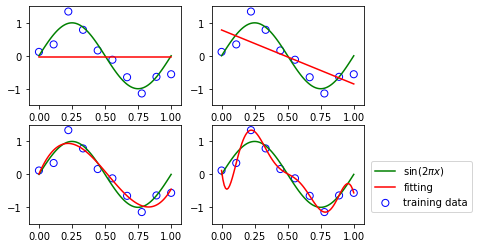

In [7]:
M = [0, 1, 3, 9]
for i, degree in enumerate(M):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
    
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

그림에서 확인할 수 있듯 $M$ 값이 너무 작으면 under-fitting, 너무 높으면 오버피팅 over-fitting 현상이 발생한다.

    M 이 1인 경우에는 그냥 직선의 방정식이 되어 단순한 직선 회귀식이 됨.
    M 이 너무 큰 경우는 노이즈에 대한 학습 결과도 모델 자체에 포함되어 주어진 데이터에 over-fitting 된 결과를 얻음
   
그림은 M = 3 일 때까 제일 좋아 보임 일반화 문제까지 감안

### 모델 평가

각 모델 별로 에러 값의 정도를 수치화하기 위해 RMS 에러를 정의하도록 하자.
$$
E_{RMS} = \sqrt \frac{2E(w^*)}{N}
$$

RMS = Root Mean Square

문제 정의 자체가 Error 를 최소화 하는 것이므로 RMS 가 작을수록 더 적합한 모델임을 알 수 있다.

-> 데이터 샘플 크기인 N으로 나누는 이유는 서로 다른 데이터 크기를 가지는 경우에 발생하는 스케일 문제를 보정하기 위한 정규화 이다.


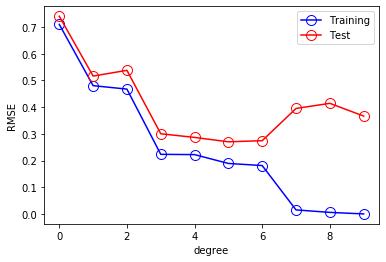

In [14]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a-b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=(len(y_test)))))
    
    
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

각각의 M에 대해 RMS 의 값을 확인해보면 학습 데이터와 테스트 데이터 차이를 쉽게 확인할 수 있다.

M 이 커질수록 학습 데이터에 대한 RMSE 는 작아지지만 Test RMSE 는 커지므로 오버피팅을 확인할 수 있다.

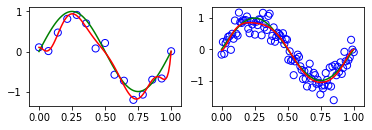

In [26]:
degree = 9
for i in range(2):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    if i == 0:
        x_train, y_train = create_toy_data(func, 15, 0.25)
    else:
        x_train, y_train = create_toy_data(func, 100, 0.25)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    
plt.show()

위 그림에서 사용한 M의 값은 둘다 9로 동일하다. 그러나 왼쪽은 샘플 크기가 15 이고 오른쪽은 샘플 크기가 100 인 데이터이다. 앞서 살펴보았듯 적은 수의 샘플의 사용하는 경우는 오버피팅 현상이 발생하였다. 하지만 샘플 데이터가 많으면 우측 그림과 같이 오버피팅 현상을 막을 수 있다.

즉, 관찰 데이터 개수가 많다면 오버피팅 현상을 막을 수 있다.

    휴리스틱 관점에서는 모델 파라미터의 개수는 샘플 크기의 1/5, 1/10 정도보다 작게 설정하는 것이 좋다.
    물론 모델의 복잡도는 해결하고자 하는 문제에 맞게 결정하는 것이 합리적이다.
    
    오버피팅 현상은 피할 수 없는 운명이다.. (MLE, 베이지안 접근 방식을 통해 해결하는 방식을 알아볼 예정)
    

그럼 주어진 데이터는 별로 없는데, M이 높은 모델을 만들어낼 방법은??

--> Reguralization 기법이다.

모든 모델에서 오버피팅으로 인해 $W$ 값이 매우 커지거나 작아지는 것은 아니다. 하지만 앞서 보았던 모델에서는 오버피팅이 발생하면 $W$ 값이 매우 커지거나 작아지는 것을 확인할 수 있다. 

### M = 3
![M = 3](./misc/M3.png)


### M = 9
![M = 9](./misc/M9.png)

따라서 $W$ 가 취할 수 있는 값의 범위를 제한하여 가급적 큰 범위를 가지는 $W$ 가 안나오도록 하는 것이다.

아래의 수식이 그 원리다.
$$
E(W) = \frac{1}{2}\sum_{n=1}^N \{y(x_n, W) - t_n\}^2 + \frac{\lambda}{2}||W||^2
$$
여기서 $||W||^2 \equiv W^T W \equiv w_0^2 + w_1^2 + ... + w_M^2$ 이다.

계수 $\lambda$ 는 매우 중요한 요소로 regularization term or regularization coefficient라 부른다.

regularization 이 추가되었다라도 식 자체는 $W$ 에 대해 닫힌 구조라는 것은 변함 없다. (-> 해를 구할 수 있음)

위와 같은 Reguralization 은 Ridge Reguralization 이라고 한다. (Lasso, Elastic 등 있음)


In [27]:
class RidgeRegression(object):
    """
    Ridge regression model
    
    w* = argmin |t - X @ w| + lambda * |w|_2^2
    """
    
    def __init__(self, alpha:float=1.):
        self.alpha = alpha
        
    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        maximum a posteriori estimation of parameter
        
        Parameters
        ----------
        X : (N, D) np.ndarray
            training data independent variable
        t : (N,) np.ndarray
            training data dependent variable
        """ 
    
        eye = np.eye(np.size(X, 1))
        self.w = np.linalg.solve(self.alpha * eye + X.T @ X, X.T @ t)
        
    def predict(self, X:np.ndarray):
        """
        make prediction given input
        
        Prameters
        ---------
        X : (N, D) np.ndarray
            samples to predict their output
            
        Returns
        -------
        (N,) np.ndarray
            prediction of each input
        """
        return X @ self.w

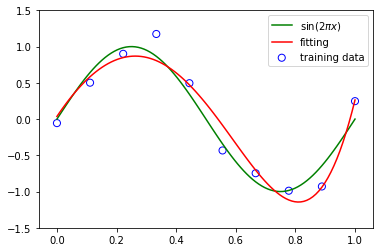

In [30]:
x_train, y_train = create_toy_data(func, 10, 0.25)

feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.show()


위는 $ln\lambda = -3$ 인 값이고 아래는 0인 값이다. 

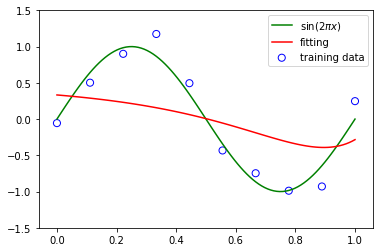

In [32]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1)
model.fit(X_train, y_train)
y = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.show()

결국 $\lambda$ 값은 하이퍼 파라미터로 사용자가 최적의 값을 찾아 내서 일반화 문제에 적당히 해결해야 한다고 생각한다.


Ref: http://norman3.github.io/prml/docs/chapter01/1

Ref Code: https://github.com/ctgk/PRML